In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/Tesi/Iteration improvement/Results/results_rnn.json') as f:
    data = json.load(f)

print(data)

[{'R2': 0.48525906237557026, 'MAE': 0.06834935942353854, 'RMSE': 0.09336074415394775, 'Number of Hidden Layers': 256, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 702.5793595314026}, {'R2': 0.33544935191388314, 'MAE': 0.0775309950292483, 'RMSE': 0.10608011771443056, 'Number of Hidden Layers': 64, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 141.5116903781891}, {'R2': 0.25608287558682674, 'MAE': 0.0806776863585991, 'RMSE': 0.11223601231023848, 'Number of Hidden Layers': 256, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 137.86039304733276}, {'R2': -0.02128591195953855, 'MAE': 0.09925455848375957, 'RMSE': 0.1315054102950298, 'Number of Hidden Layers': 128, 'Learning Rate': 0.01, 'Number of Epochs': 200, 'Number of Iterations': 20, 'training_time': 213.69180870056152}, {'R2': -0.02520038134259117, 'MAE': 0.09920294404373886, 'RMSE': 0.1317571916

In [5]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data)

# Display the DataFrame
df.head()

,R2,MAE,RMSE,Number of Hidden Layers,Learning Rate,Number of Epochs,Number of Iterations,training_time
0,0.485259,0.068349,0.093361,256,0.001,200,10,702.579360
1,0.335449,0.077531,0.106080,64,0.001,200,10,141.511690
2,0.256083,0.080678,0.112236,256,0.001,200,10,137.860393
3,-0.021286,0.099255,0.131505,128,0.010,200,20,213.691809
4,-0.025200,0.099203,0.131757,64,0.010,200,20,211.069336


# Plot

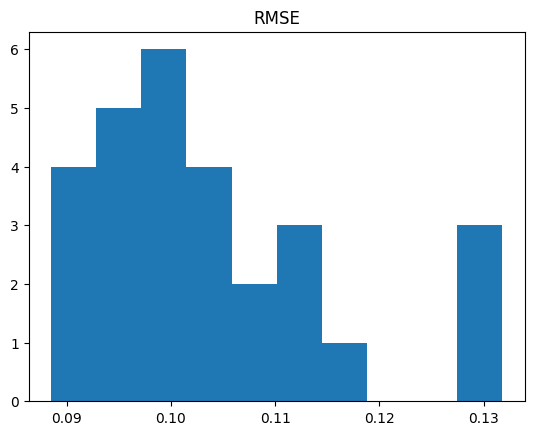

In [6]:
ax = df.hist(column='RMSE', grid=False)

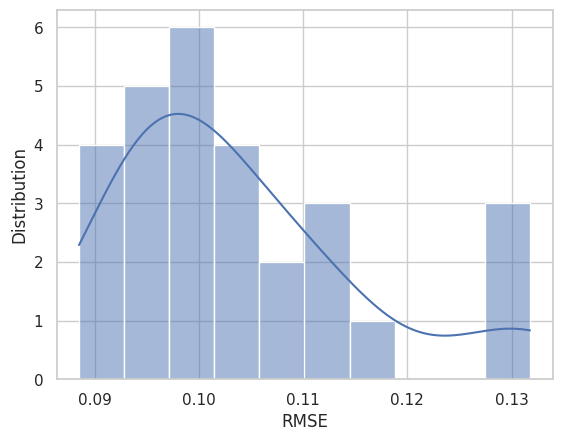

In [7]:
sns.set(style="whitegrid")

ax = sns.histplot(data=df, x='RMSE', kde=True, bins=10)

ax.set_ylabel('Distribution')

plt.show()

# Select the best data

In [8]:
mu = df['RMSE'].mean()
std = df['RMSE'].std()

print(f"mean: {round(mu, 2)}")
print(f"standard deviation: {round(std, 2)}")

mean: 0.1
standard deviation: 0.01


In [9]:
subset = df[(df["RMSE"] < mu + 2*std) & ( df["R2"] >0)]
subset.sort_values(by=['R2'], inplace=True, ascending=False)

subset = subset.iloc[:5]

subset

<ipython-input-9-402a4b7284b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.sort_values(by=['R2'], inplace=True, ascending=False)


,R2,MAE,RMSE,Number of Hidden Layers,Learning Rate,Number of Epochs,Number of Iterations,training_time
21,0.537323,0.066346,0.088513,256,0.001,200,30,691.759469
11,0.495140,0.067789,0.092460,64,0.001,200,30,743.772250
12,0.494502,0.068937,0.092519,128,0.001,200,30,143.794678
20,0.493701,0.068531,0.092592,128,0.001,200,30,211.004597
0,0.485259,0.068349,0.093361,256,0.001,200,10,702.579360
